___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [3]:
df0 = pd.read_csv("Churn_Modelling.csv")
df = df0.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.shape

(10000, 14)

In [6]:
df.Surname.nunique()

2932

In [7]:
df.CustomerId.nunique()

10000

In [8]:
df.duplicated().sum()

0

In [9]:
df[df["IsActiveMember"] == df["Exited"]]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.720,2,0,0,80181.120,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.000,2,1,0,76390.010,0
12,13,15632264,Kay,476,France,Female,34,10,0.000,2,1,0,26260.980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.410,1,1,0,29179.520,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df[df["Geography"] == "France"]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1


In [14]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [16]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

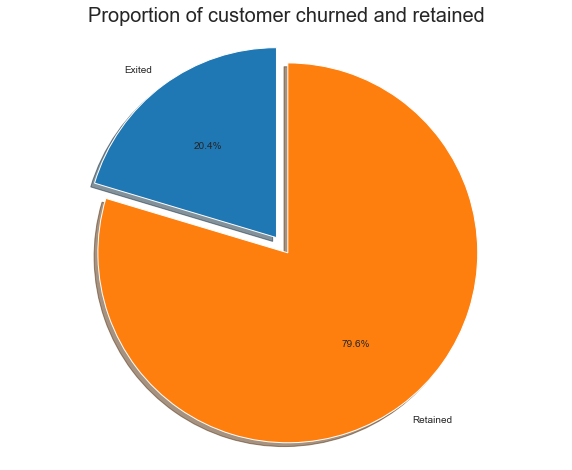

In [17]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64

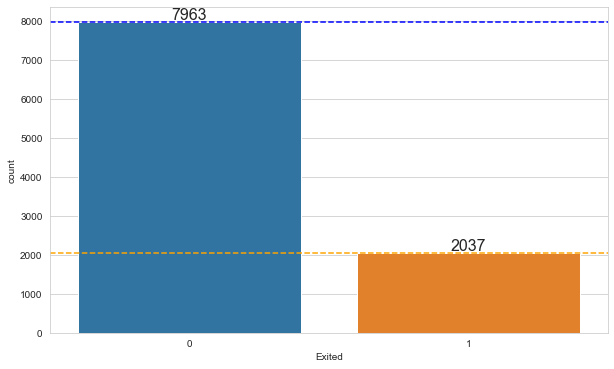

In [18]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

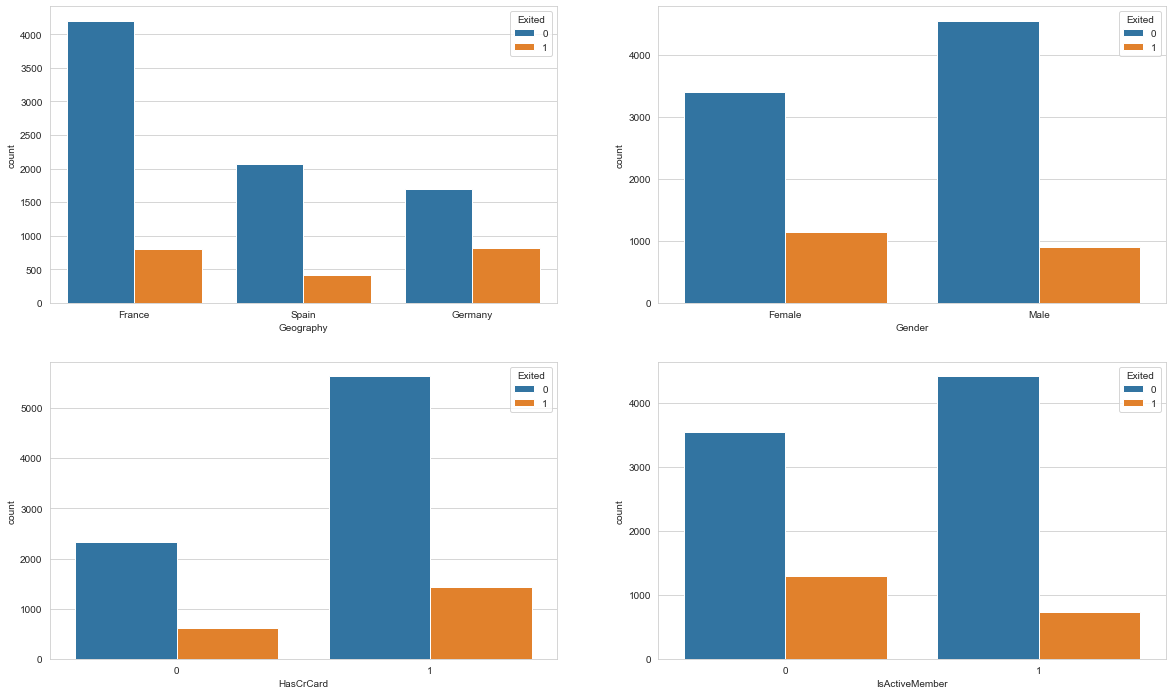

In [19]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

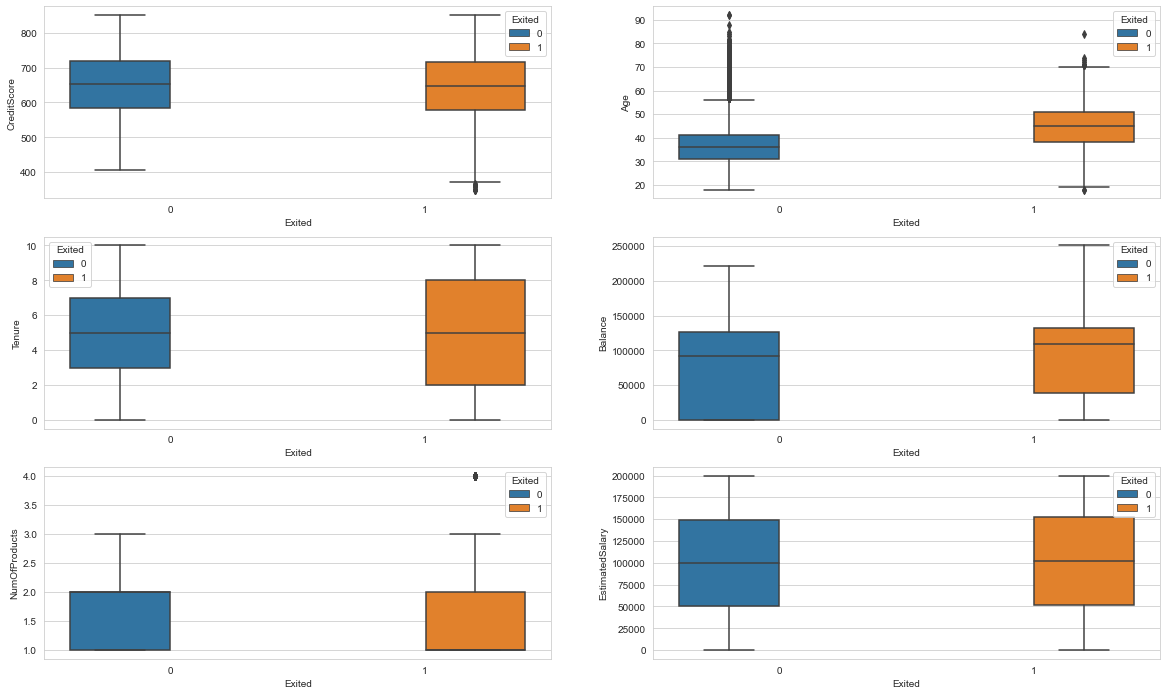

In [20]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1]);

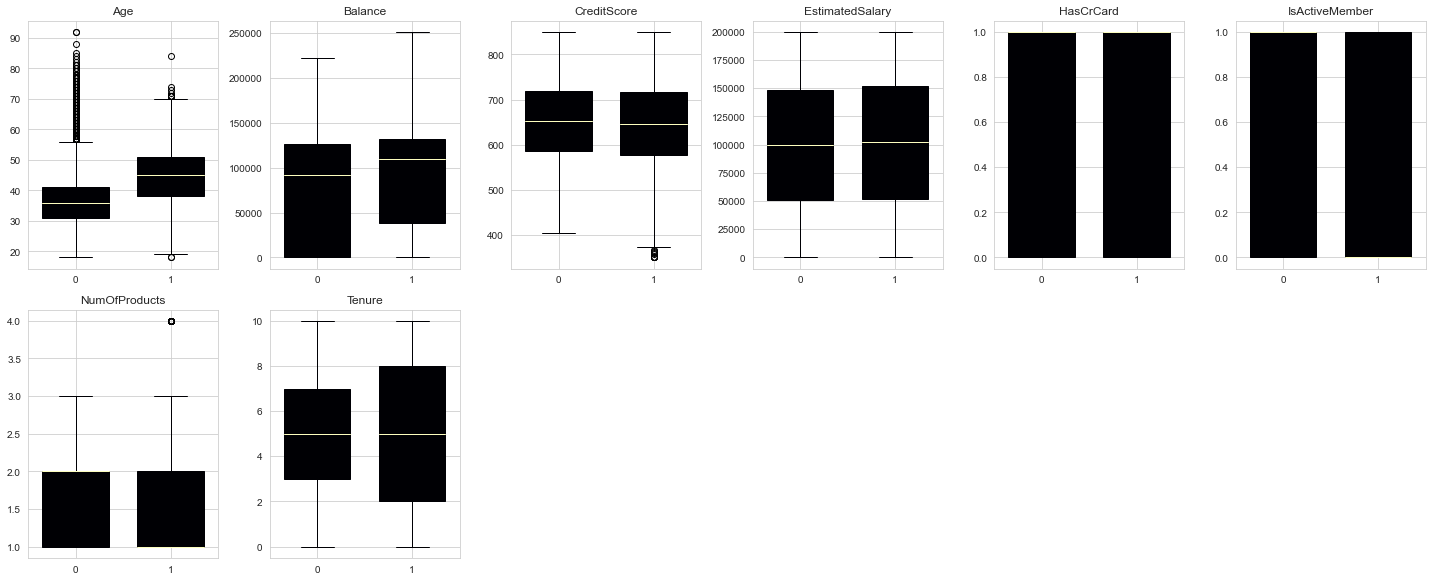

In [21]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

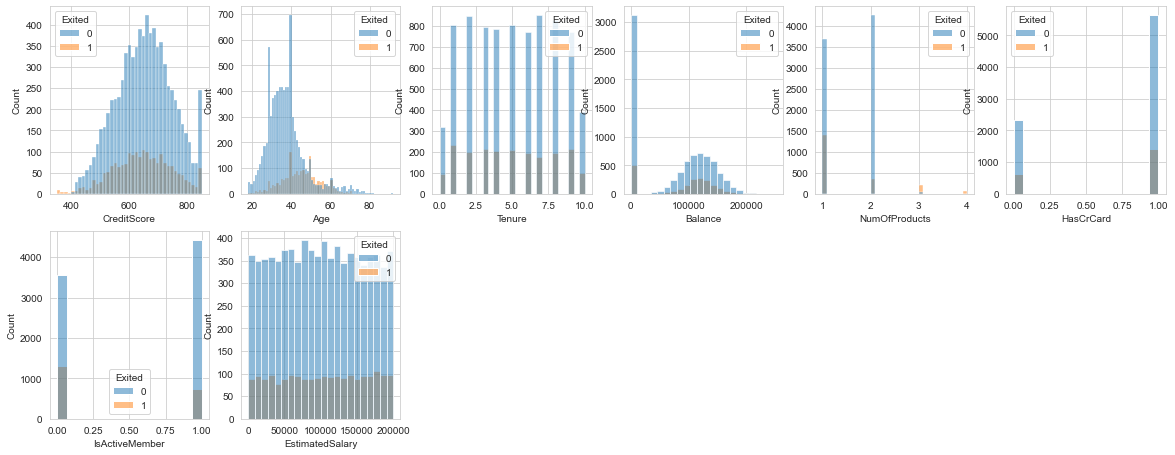

In [22]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

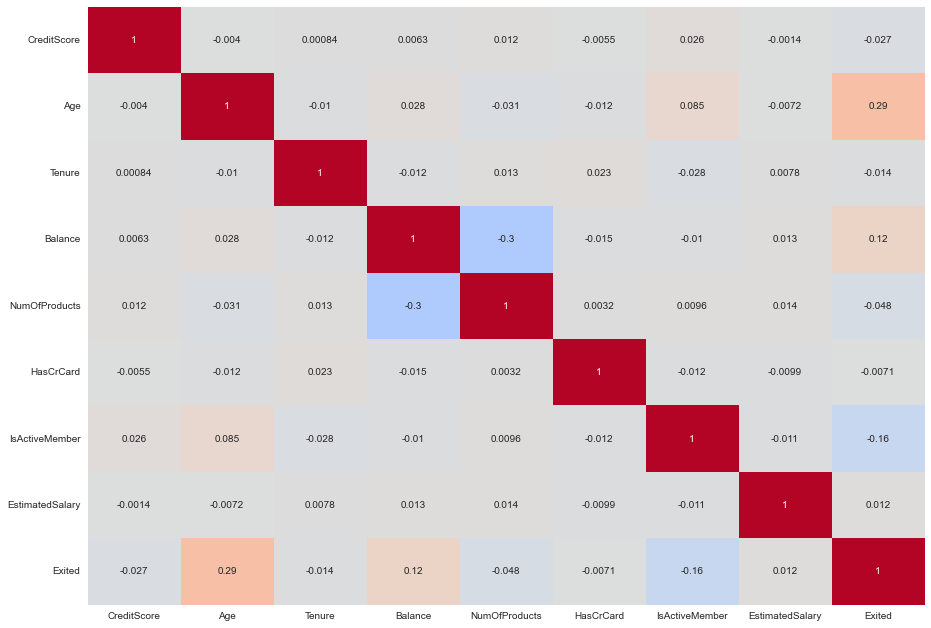

In [23]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False) #numeric_only=True
plt.show()

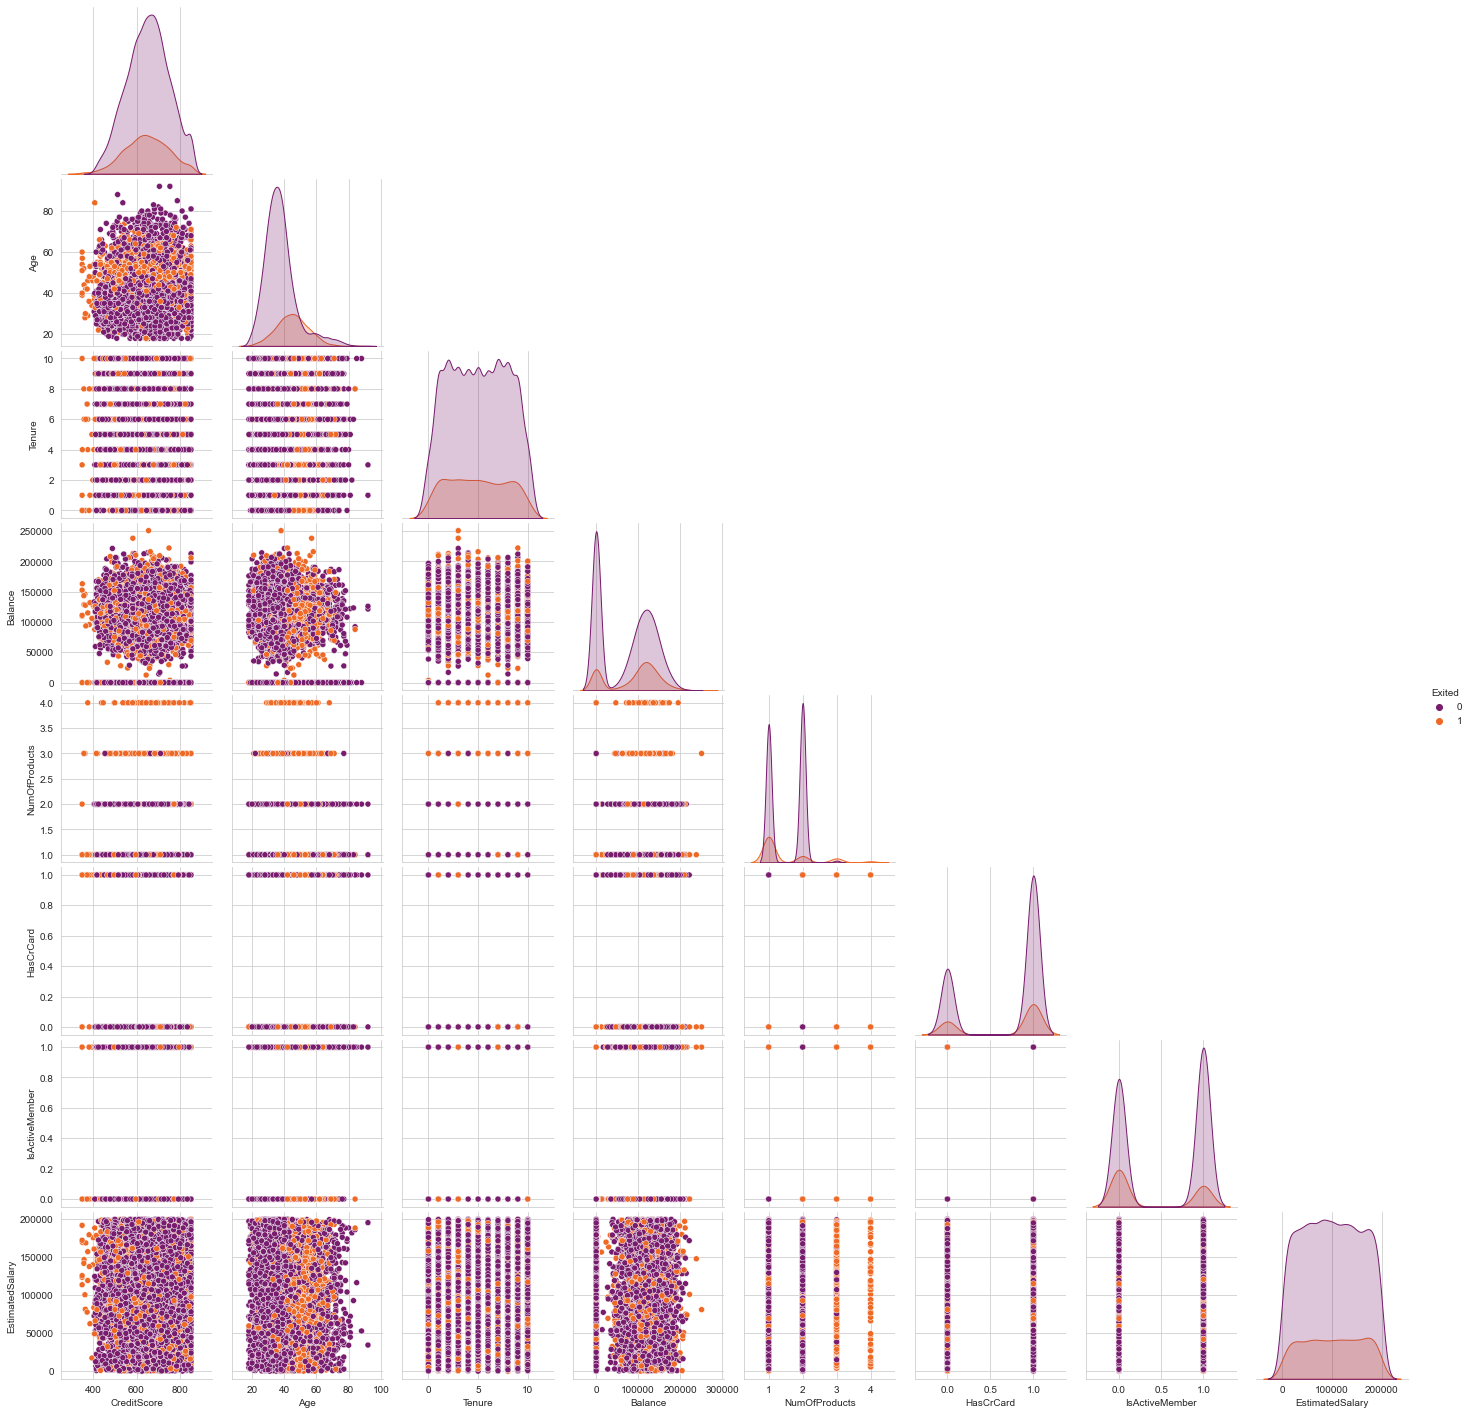

In [24]:
sns.pairplot(df, hue="Exited", palette="inferno", corner=True);

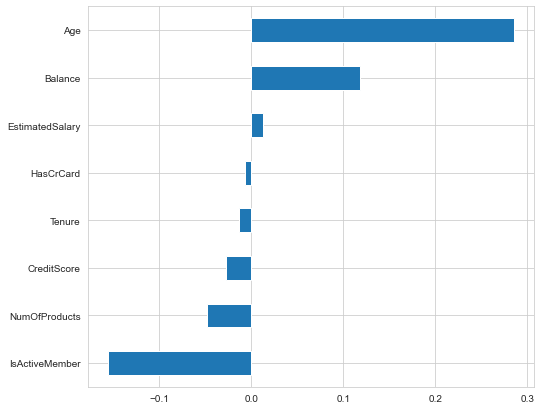

In [25]:
plt.figure(figsize = (8, 7))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [26]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [27]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [29]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)
# bunun yuzunden prpblem oldu.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [31]:
scaler = MinMaxScaler()
# scaler = RobustScaler()

In [32]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
X_train.shape

(9000, 11)

In [35]:
X_test.shape

(1000, 11)

In [36]:
model = Sequential()

model.add(Dense(32, activation = "relu"))  # sigunt ve hiperb. e göre öğrenme daha fazla olduğu için relu kullandık.
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [37]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20)

In [38]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.5081 - accuracy: 0.7959 - val_loss: 0.4703 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7988 - val_loss: 0.4404 - val_accuracy: 0.8144
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8053 - val_loss: 0.4133 - val_accuracy: 0.8200
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8144 - val_loss: 0.3965 - val_accuracy: 0.8333
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8205 - val_loss: 0.3718 - val_accuracy: 0.8500
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8304 - val_loss: 0.3558 - val_accuracy: 0.8656
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8373 - val_loss: 0.3425 - val_accuracy:

# The Evaluation of Model with Default Parameters (without class_weigth)

In [39]:
model.summary()

# 1000 x 15 iterasyon oldu.
# her iterasyonda 1231 tane parametre güncellemesi yapıldı.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.508,0.796,0.470,0.799
1,0.468,0.799,0.440,0.814
2,0.447,0.805,0.413,0.820
3,0.426,0.814,0.396,0.833
4,0.413,0.820,0.372,0.850


# Grafikleri okuma kismi problem su an.

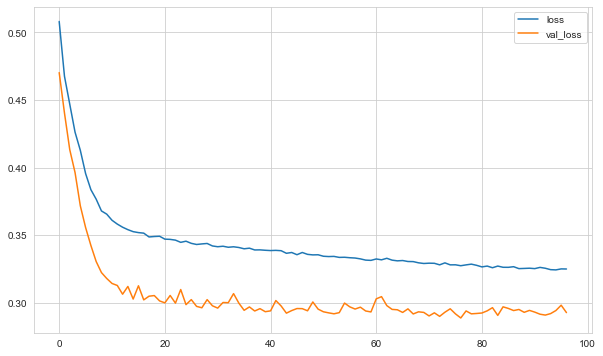

In [57]:
loss_df[["loss", "val_loss"]].plot();

In [42]:
model.evaluate(X_test, y_test, verbose=0)

[0.3383691608905792, 0.8610000014305115]

In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3383691608905792
accuracy :  0.8610000014305115


In [44]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   # 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[764  32]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [45]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32") # 1 olma ihtimali 0.5 ten büyükse 1 yap
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

282/282 [==============================] - 0s 1ms/step
[[764  32]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

[[6911  256]
 [ 933  900]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7167
           1       0.78      0.49      0.60      1833

    accuracy                           0.87      9000
   macro avg       0.83      0.73      0.76      9000
weighted avg       0.86      0.87      0.86      9000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [47]:
from sklearn.utils import class_weight

In [48]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [49]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))  
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

model_weighted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

- bu data ile calisilmis mi? 1. bakilabilir durum.
- 11 X 1,5 noron ilk hidden layer. (makalelerden) (18,18,1) cok tavsiye edilmiyor. yavas yavas dusmesi daha iyi
- optuna bir cikis noktasi veriyor.
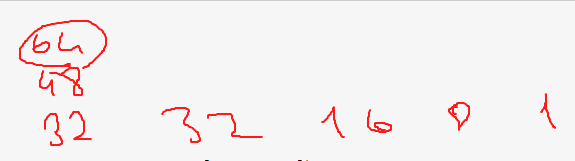
- layer icin: data miktari onemli. layer ve noron artmasi complex model. 
- underfitting overfitting durumuna gore optimize ederek karar veriliyor.

# Noron ve layer sayisi icin bir takim ortalamalar veya avantaj dezavantaj kisimlari

In [50]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [51]:
model_weighted.fit(x = X_train, y = y_train, 
                   validation_split = 0.1, 
                   batch_size = 32, 
                   epochs = 1000, 
                   verbose=1, 
                   callbacks = [early_stop], 
                   )

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7886 - val_loss: 0.4578 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7985 - val_loss: 0.4318 - val_accuracy: 0.8133
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8090 - val_loss: 0.4122 - val_accuracy: 0.8244
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8149 - val_loss: 0.4015 - val_accuracy: 0.8300
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8180 - val_loss: 0.3878 - val_accuracy: 0.8467
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8248 - val_loss: 0.3763 - val_accuracy: 0.8533
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8301 - val_loss: 0.3596 - val_accuracy:

In [52]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

In [53]:
# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 36)                432       
                                                                 
 dense_7 (Dense)             (None, 18)                666       
                                                                 
 dense_8 (Dense)             (None, 9)                 171       
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(11, 36) dtype=float32, numpy=
 array([[ 0.2741577 ,  0.11310518,  0.08553147,  0.10243464, -0.24724242,
         -0.2537634 , -0.24539074, -0.06058878,  0.3315649 , -0.19014704,
          0.0943459 , -0.31372374,  0.26019305, -0.23336679,  0.17774552,
          0.26292145,  0.20971131,  0.22284245,  0.04663178, -0.05264673,
         -0.22977254,  0.27733618, -0.31821314, -0.29553258,  0.324714  ,
         -0.01368397, -0.1112971 ,  0.13361362,  0.2867657 , -0.10095838,
          0.08069864, -0.11211829,  0.32625413, -0.1188771 ,  0.31401432,
         -0.1086566 ],
        [ 0.31297565, -0.09735587,  0.00228655, -0.19656426, -0.03908533,
          0.02680174,  0.06085515, -0.16060226, -0.1686685 ,  0.16356903,
         -0.3424869 ,  0.11803588,  0.2176668 ,  0.22094005,  0.2605688 ,
          0.27380502, -0.2240484 ,  0.02223712, -0.32538107, -0.18837272,
         -0.09014156,  0.13084945, -0.03493705,  0.09155896, -0.11751847,
          0.2675489

In [56]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

NameError: name 'X_val' is not defined

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

AttributeError: 'NoneType' object has no attribute 'history'

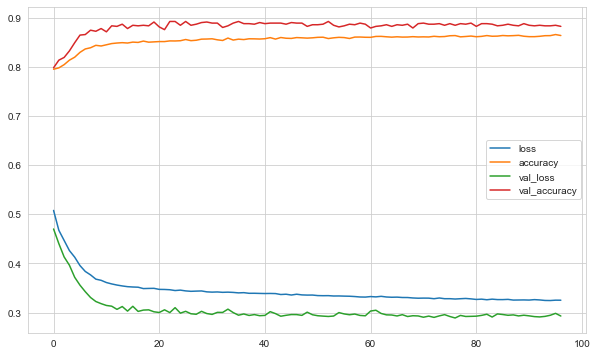

In [59]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10) iceriye
plt.show()

# mavi kirmizi altta veya ustte olmasi neye gore degisiyor, onemli mi? 

# Bu grafik neden bu kadar girdi ciktili

In [60]:
model.evaluate(X_test, y_test, verbose=0)

[0.7268990874290466, 0.3160000145435333]

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model_weighted.summary()

In [ ]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

In [ ]:
loss_df.plot();

In [ ]:
model_weighted.evaluate(X_test, y_test, verbose=0)

In [ ]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [61]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.009)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :



model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Monitor the "val_recall" as metric

# metrik icine recal veya accuracy degisti, monitor kismi degismiyor dimi ?

In [62]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=[tf.Keras.metrics.Recall]) # ["recall"]

In [63]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="auto",
                           verbose=1,
                           patience=15)

- recall alinca max yazmayi unutmamak lazim.
- loss sa min 
- NLP de ilk basta cok yuksek olabiliyor. CNN ya da NLP de cok hizli overfittige gidiyor patience daha yuksek alacagiz.

In [64]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=10,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/10
64/64 [==============================] - 2s 11ms/step - loss: 0.6757 - recall: 0.3226 - val_loss: 0.5788 - val_recall: 0.0000e+00
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.5229 - recall: 0.0000e+00 - val_loss: 0.4870 - val_recall: 0.0000e+00
Epoch 3/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4885 - recall: 0.0000e+00 - val_loss: 0.4726 - val_recall: 0.0000e+00
Epoch 4/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4764 - recall: 0.0000e+00 - val_loss: 0.4588 - val_recall: 0.0000e+00
Epoch 5/10
64/64 [==============================] - 0s 4ms/step - loss: 0.4674 - recall: 0.0139 - val_loss: 0.4498 - val_recall: 0.0221
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.4614 - recall: 0.0321 - val_loss: 0.4440 - val_recall: 0.0387
Epoch 7/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4563 - recall: 0.0563 - val_loss: 0.4388 - val_recall: 0.0884
Epoch 8/10
64/64 [=

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

# bu grafik yorumlamasi

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Optuna

In [65]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2

In [66]:
import optuna

In [67]:
early_stop = EarlyStopping(monitor="accuracy", mode="auto", verbose=1, patience=20, restore_best_weights=True)

In [68]:
trial_metric = "accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 32, 64) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 32)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 1, 8)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=10,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

# optuna n_jobs ile hata verdi neden ? study.optimize(objective, n_trials=8, n_jobs=-1)

In [72]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=5, n_jobs=-1) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-18 13:22:29,929] A new study created in memory with name: no-name-c92e5eae-2fba-4109-9634-8deaf7282345


Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


[I 2023-05-18 13:22:42,073] Trial 3 finished with value: 0.3580000102519989 and parameters: {'n_units1': 49, 'n_units2': 27, 'n_units3': 8, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0013810943357437733, 'regularizer1': 0.0003459354452303494, 'regularizer2': 0.0007702235394871144, 'dropout': 0, 'w0': 0.022061111985354823, 'w1': 0.011715718826868556}. Best is trial 3 with value: 0.3580000102519989.


Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.


[I 2023-05-18 13:22:42,954] Trial 0 finished with value: 0.20399999618530273 and parameters: {'n_units1': 64, 'n_units2': 22, 'n_units3': 7, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.09524709974878412, 'regularizer1': 0.00036883175543368237, 'regularizer2': 0.00012306422206861126, 'dropout': 0, 'w0': 0.011228248652065228, 'w1': 0.05638671794225077}. Best is trial 3 with value: 0.3580000102519989.


Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Restoring model weights from the end of the best epoch: 2.
Epoch 10: early stopping
Epoch 10: early stopping


[I 2023-05-18 13:22:43,913] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 32, 'n_units2': 24, 'n_units3': 3, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.005272107983202936, 'regularizer1': 4.048123782375265e-05, 'regularizer2': 1.4244959786302866e-05, 'dropout': 0, 'w0': 0.3620252196784755, 'w1': 0.18117559431986263}. Best is trial 4 with value: 0.7960000038146973.
[I 2023-05-18 13:22:43,916] Trial 2 finished with value: 0.7910000085830688 and parameters: {'n_units1': 58, 'n_units2': 16, 'n_units3': 1, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0825535619324615, 'regularizer1': 0.0005754599202069257, 'regularizer2': 0.00012353275308355738, 'dropout': 0, 'w0': 0.054632847449471944, 'w1': 0.019390525468494856}. Best is trial 4 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 2.
Epoch 10: early stopping


[I 2023-05-18 13:22:44,152] Trial 1 finished with value: 0.6669999957084656 and parameters: {'n_units1': 43, 'n_units2': 24, 'n_units3': 5, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.04057252589042857, 'regularizer1': 0.00011627568088116694, 'regularizer2': 0.000308367369850858, 'dropout': 0.5, 'w0': 1.7461614627013144, 'w1': 1.5673024982565567}. Best is trial 4 with value: 0.7960000038146973.


{'n_units1': 32,
 'n_units2': 24,
 'n_units3': 3,
 'optimizer': keras.optimizers.adam.Adam,
 'learning_rate': 0.005272107983202936,
 'regularizer1': 4.048123782375265e-05,
 'regularizer2': 1.4244959786302866e-05,
 'dropout': 0,
 'w0': 0.3620252196784755,
 'w1': 0.18117559431986263}

In [70]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=5) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-18 13:21:53,418] A new study created in memory with name: no-name-b79887ac-133c-42c2-9b35-4b265f4f4ae5
[W 2023-05-18 13:21:53,518] Trial 0 failed with parameters: {'n_units1': 59, 'n_units2': 25, 'n_units3': 2, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.014857590146354202, 'regularizer1': 1.3474906745286218e-05, 'regularizer2': 0.0005344793581848332, 'dropout': 0.5, 'w0': 0.09574418055785654, 'w1': 0.06740872405794521} because of the following error: NameError("name 'X_val' is not defined").
Traceback (most recent call last):
  File "C:\Users\dogru\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\dogru\AppData\Local\Temp\ipykernel_23748\1702695980.py", line 64, in objective
    validation_data=(X_val, y_val),
NameError: name 'X_val' is not defined
[W 2023-05-18 13:21:53,519] Trial 0 failed with value None.


NameError: name 'X_val' is not defined

# cv teorikte.
- soru--> teorik demistiniz, degerler random old icin. ise yarar bi kismi var mi yoksa yanlis mi hatirladim? 

In [ ]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)


model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

In [ ]:
history = model.history.history

In [ ]:
loss_df = pd.DataFrame(history)
loss_df.plot() #subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

# roc_auc hatirlanacak. siniflari iyi ayristirma orani?

- precision recall curve / imbalanced data sinif ayrimlari kaliteli mi.

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
y_pred_proba = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
model.save('model_churn.h5')

# Final Model and Model Deployment

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

In [ ]:
final_model = Sequential()

final_model.add(Dense(40, activation = "relu"))
final_model.add(Dense(30, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(learning_rate = 0.06268959668744448)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

- paralel modeller icin keras functional API 
- biraz daha ileri seviye.
- mimarileri farkli. 

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [ ]:
class_weight = {0: 0.13629094883118786, 1: 0.16938474875924936}

In [ ]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 1000, 
                verbose = 1, 
                callbacks = [early_stop], 
                class_weight = class_weight)

In [ ]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [ ]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_exited.h5')

## Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_exited = load_model('model_exited.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [ ]:
num_column = df.shape[1]  # DataFrame'deki sütun sayısını alalım
target_column = 'Exited'  # Sona taşımak istediğimiz sütunun adı

# Sütunun mevcut indeksini alalım
target_column_index = df.columns.get_loc(target_column)

# Sütunu sona taşıyalım
df = df.iloc[:, [i for i in range(num_column) if i != target_column_index] + [target_column_index]]

# Sonucu gösterelim
df

In [ ]:
random_ten_customer = df.sample(n=10, random_state=101).iloc[0:10, :11]

random_ten_customer

In [ ]:
random_ten_customer = scaler_exited.transform(random_ten_customer)

random_ten_customer

In [ ]:
prediction = pd.DataFrame(model_exited.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

In [ ]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

In [ ]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

In [ ]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___